Saving kaggle.json to kaggle.json
100% 1.86G/1.87G [00:07<00:00, 265MB/s]
100% 1.87G/1.87G [00:07<00:00, 256MB/s]
Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      58,982,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,077,186 (225.36 MB)

 Trainable params: 59,077,186 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.5651 - loss: 394.1154 - val_accuracy: 0.5182 - val_loss: 0.7349
Epoch 2/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 164ms/step - accuracy: 0.5712 - loss: 1.3669 - val_accuracy: 0.6140 - val_loss: 0.6564
Epoch 3/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.6393 - loss: 0.6842 - val_accuracy: 0.7282 - val_loss: 0.5464
Epoch 4/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.7344 - loss: 0.5352 - val_accuracy: 0.7762 - val_loss: 0.4813
Epoch 5/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.7828 - loss: 0.4612 - val_accuracy: 0.7734 - val_loss: 0.4986
Epoch 6/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.8168 - loss: 0.4103 - val_accuracy: 0.7928 - val_loss: 0.4783
Epoch 7/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.8553 - loss: 0.3417 - val_accuracy: 0.7956 - val_loss: 0.5355
Epoch 8/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.8999 - loss:

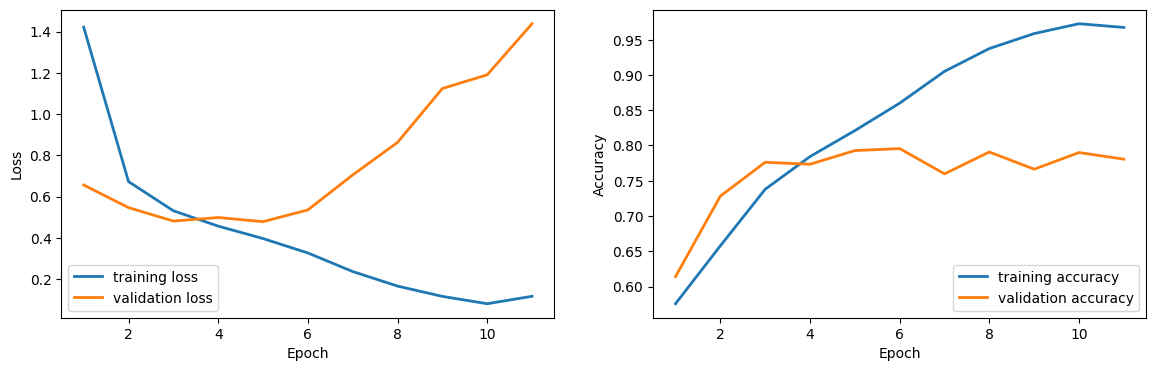

Found 300 files belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6650 - loss: 2.2754
label
1    553
0    514
Name: count, dtype: int64


In [1]:
# Paso 1: Autenticación y Descarga Automática de Datos desde Kaggle
from google.colab import files
import os

# Subir el archivo kaggle.json
files.upload()  # Sube el archivo kaggle.json aquí

# Configuración de Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir datos de Kaggle
!kaggle competitions download -c u-tad-dogs-vs-cats-2024
!unzip -q u-tad-dogs-vs-cats-2024.zip -d /content/dogs-vs-cats

# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from tensorflow import data as tf_data
import keras

# Establecer una semilla para reproducibilidad
seed = 42
keras.utils.set_random_seed(seed)

# Definir el tamaño de las imágenes
image_size = (256, 256)

# Definir el tamaño del batch
batch_size = 125

# Cargar los conjuntos de datos de entrenamiento y validación
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/dogs-vs-cats/train/train",  # Ajusta esta ruta según la estructura de tu dataset
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
)

# Construcción del modelo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_shape = image_size + (3,)

model = Sequential()
model.add(keras.Input(shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

# Compilar el modelo
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 12

# Entrenar el modelo
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

# Graficar las métricas de entrenamiento
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:, "loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:, "val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:, "accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[1:, "val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

# Guardar el modelo
model.save("model.keras")

# Cargar el conjunto de datos suplementario
supplementary_ds = keras.utils.image_dataset_from_directory(
    "/content/dogs-vs-cats/supplementary_data/supplementary_data",  # Ajusta esta ruta
    image_size=image_size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
)

# Evaluar el modelo
model.evaluate(supplementary_ds, return_dict=True, verbose=1)

# Realizar predicciones
folder_path = "/content/dogs-vs-cats/test/test"  # Ajusta esta ruta

predictions_dict = {}

for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)

    # Guardar el nombre del archivo
    file_name = img.split('/')[-1]
    file_no_extension = file_name.split('.')[0]

    img = keras.utils.load_img(img_path, target_size=image_size)
    img_array = keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
    prediction = model.predict(img_array, verbose=None)
    label = np.argmax(prediction)

    # Guardar las predicciones en un diccionario
    predictions_dict[int(file_no_extension)] = label

# Crear el DataFrame de resultados y guardarlo como CSV
submission = pd.DataFrame(predictions_dict.items(), columns=["id", "label"]).sort_values(by='id', ascending=True)
submission.to_csv('submission.csv', index=False)

# Imprimir la cuenta de cada etiqueta de clase
print(submission["label"].value_counts())
